In [7]:
import anuga
import numpy as np
import matplotlib.pyplot as plt
import rasterio

%matplotlib inline

# Allow inline jshtml animations
from matplotlib import rc
rc('animation', html='jshtml')


BoundingBox(left=313166.465, bottom=6213497.168, right=314310.465, top=6214971.168)
313166.465


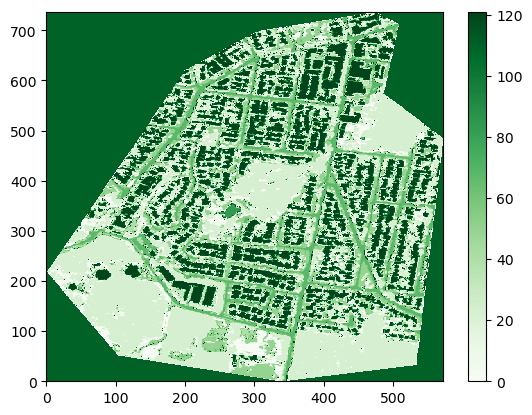

(737, 572)
0 121
[313166.465, 6213497.168] 1144.0 1474.0


In [14]:
tif_filename = 'mannings.tif'
src = rasterio.open(tif_filename)
from rasterio.plot import show

#show(src)

bounds = src.bounds
print(src.bounds)
print(src.bounds[0])
origin = [bounds[0],bounds[1]]

data = src.read(1)

data = np.flipud(data)

#plt.figure(figsize=(10,10))
ax = plt.axes()
plt.pcolormesh(data, cmap='Greens', vmin=0.0, vmax=121)
plt.colorbar()
plt.show()

print(data.shape)
print(data.min(), data.max())
len_east = bounds[2] - bounds[0]
len_north = bounds[3] - bounds[1]

print(origin, len_east, len_north)

Figure files for each frame will be stored in _plot


Warning 1: The definition of projected CRS EPSG:7856 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.


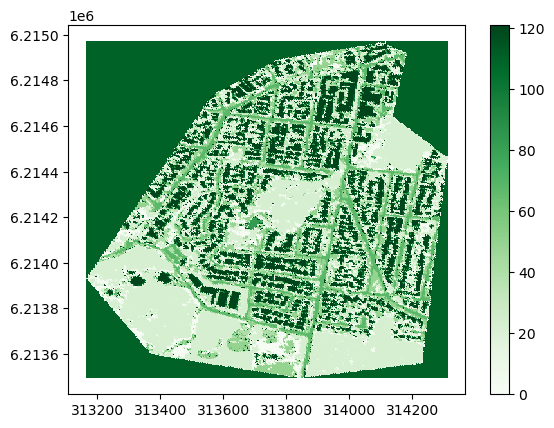

In [15]:
domain = anuga.rectangular_cross_domain(200,200,
                               len1=len_east,
                               len2=len_north,
                                origin=origin)
domain.set_zone(56)
domain.set_hemisphere('southern')

dplotter = anuga.Domain_plotter(domain) # should set this up via a set_plotter command


# Use tif file to set elevation
domain.set_quantity('friction', 
                    filename = 'mannings.tif', 
                    location='centroids')

friction_c = domain.quantities['friction'].centroid_values

plt.tripcolor(dplotter.triang,
              facecolors = friction_c,
              cmap='Greens',
              #edgecolors='k',
              vmin=0.0, 
              vmax=121)
plt.colorbar();


In [ ]:
np.linalg.norm